# Project name --> 🏠 House Price Estimator!

##  Building Linear Rregression model Using all  "Advanced Regression Techniques" 

### Datastes    = Indian Real Estate Dataset  from (Kaggel)

### importing requred libraries

In [87]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.linear_model import Lasso , Ridge  # two models
from xgboost import XGBRegressor 
from sklearn.preprocessing import PolynomialFeatures  # preprocessing 
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder




### Data Exploring

In [88]:
# Loading datasets
file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\cleaned_crime_dataset.csv123"
house_data = pd.read_csv(file_path)
house_data = house_data.copy()


C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_18860\3409123842.py:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  house_data = pd.read_csv(file_path)


In [89]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27798 entries, 0 to 27797
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_ID                     27798 non-null  object 
 1   PREFERENCE                  27798 non-null  object 
 2   DESCRIPTION                 27798 non-null  object 
 3   PROPERTY_TYPE               27798 non-null  object 
 4   CITY                        27798 non-null  object 
 5   TRANSACT_TYPE               21836 non-null  float64
 6   OWNTYPE                     27798 non-null  int64  
 7   BEDROOM_NUM                 24437 non-null  float64
 8   PRICE_PER_UNIT_AREA         27798 non-null  float64
 9   FURNISH                     27798 non-null  int64  
 10  FACING                      27798 non-null  int64  
 11  AGE                         27798 non-null  int64  
 12  TOTAL_FLOOR                 27153 non-null  float64
 13  FEATURES                    277

In [90]:
house_data.describe()

,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,TOTAL_LANDMARK_COUNT,...,POSTING_DATE,UPDATE_DATE,PROPERTY_NUMBER,MIN_PRICE,MAX_PRICE,PROJ_ID,BUILDING_ID,MIN_AREA_SQFT,MAX_AREA_SQFT,PROPERTY_TYPE__U
count,21836.000000,27798.000000,24437.000000,2.779800e+04,27798.000000,27798.000000,27798.000000,27153.000000,2.779800e+04,25723.000000,...,1.834800e+04,1.900100e+04,19001.000000,1.900100e+04,1.900100e+04,19001.000000,1.900100e+04,19001.000000,19001.000000,19001.000000
mean,1.299597,0.871969,2.623767,1.451749e+05,1.486366,2.592129,3.100367,15.003756,1.451552e+05,26.824321,...,1.688382e+12,1.690693e+12,1.560234,1.784551e+07,1.890868e+07,131126.724699,3.452197e+05,362.225194,368.556610,2.279301
std,0.458092,0.607757,1.695238,5.129011e+06,1.433947,2.373342,2.192568,14.261159,5.129010e+06,18.173518,...,5.594060e+09,2.462568e+09,2.128495,4.939898e+07,5.106954e+07,160291.395905,4.313705e+05,7932.763638,7932.886861,8.343402
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,1.652809e+12,1.665146e+12,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.393545,1.393545,1.000000
25%,1.000000,1.000000,2.000000,2.479000e+03,0.000000,0.000000,1.000000,4.000000,2.479000e+03,11.000000,...,1.688026e+12,1.689766e+12,1.000000,1.175854e+06,1.199888e+06,0.000000,0.000000e+00,68.376608,71.999825,1.000000
50%,1.000000,1.000000,3.000000,6.961000e+03,2.000000,3.000000,3.000000,10.000000,6.960000e+03,15.000000,...,1.690138e+12,1.691224e+12,1.000000,8.150001e+06,8.500000e+06,13456.000000,5.553200e+04,118.730034,120.773900,1.000000
75%,2.000000,1.000000,3.000000,1.704225e+04,2.000000,4.000000,5.000000,22.000000,1.704000e+04,49.000000,...,1.691568e+12,1.692347e+12,1.000000,1.900000e+07,2.000000e+07,300381.000000,7.882260e+05,167.225400,170.569908,2.000000
max,2.000000,4.000000,77.000000,6.000000e+08,4.000000,8.000000,6.000000,117.000000,6.000000e+08,50.000000,...,1.693026e+12,1.693027e+12,41.000000,2.147484e+09,2.147484e+09,413891.000000,1.125563e+06,728433.842400,728433.842400,90.000000


In [91]:
house_data.shape

(27798, 61)

In [92]:
house_data.head()

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,...,TOP_USPS,EXPIRY_DATE,PROPERTY_TYPE__U,SECONDARY_AREA,VALUE_LABEL,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS
0,Y71306776,S,Book your 2 BHK flat in Srijan Star Swapno Pur...,Residential Apartment,Kolkata South,2.0,1,2.0,3662.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B70113976,S,Make Natural Quest your next home. This projec...,Residential Apartment,Kolkata South,2.0,1,3.0,10500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O70374510,S,"Book your 3 BHK apartment in Garia, Kolkata So...",Residential Apartment,Kolkata South,2.0,1,3.0,8900.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q69170182,S,"Dev bhumi in joka, kolkata south by ocean land...",Residential Land,Kolkata South,2.0,1,NaN,208.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F69917588,S,Let your dream of owning a flat come true with...,Residential Apartment,Kolkata South,2.0,1,3.0,5215.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Droping null values and unwnanted columns

In [93]:
house_data.isnull().sum().to_dict()

{'PROP_ID': 0,
 'PREFERENCE': 0,
 'DESCRIPTION': 0,
 'PROPERTY_TYPE': 0,
 'CITY': 0,
 'TRANSACT_TYPE': 5962,
 'OWNTYPE': 0,
 'BEDROOM_NUM': 3361,
 'PRICE_PER_UNIT_AREA': 0,
 'FURNISH': 0,
 'FACING': 0,
 'AGE': 0,
 'TOTAL_FLOOR': 645,
 'FEATURES': 0,
 'PROP_NAME': 3449,
 'PRICE_SQFT': 0,
 'MAP_DETAILS': 0,
 'AMENITIES': 7933,
 'AREA': 0,
 'PRICE': 0,
 'PROP_HEADING': 0,
 'SECONDARY_TAGS': 0,
 'TOTAL_LANDMARK_COUNT': 2075,
 'FORMATTED_LANDMARK_DETAILS': 2075,
 'SOCIETY_NAME': 3449,
 'BUILDING_NAME': 3462,
 'location': 0,
 'BALCONY_NUM': 9794,
 'FLOOR_NUM': 5621,
 'CARPET_SQFT': 25309,
 'SUPERBUILTUP_SQFT': 22398,
 'BUILTUP_SQFT': 26118,
 'SUPER_AREA': 26978,
 'SUPERAREA_UNIT': 26978,
 'SUPER_SQFT': 26965,
 'SPID': 8797,
 'REGISTER_DATE': 8797,
 'POSTING_DATE': 9450,
 'UPDATE_DATE': 8797,
 'CLASS': 8797,
 'RES_COM': 8797,
 'PROPERTY_NUMBER': 8797,
 'MIN_PRICE': 8797,
 'MAX_PRICE': 8797,
 'PROJ_ID': 8797,
 'BUILDING_ID': 8797,
 'VERIFIED': 8797,
 'MIN_AREA_SQFT': 8797,
 'MAX_AREA_SQFT': 87

In [94]:
# droping existing columns and Similar columns
 
house_data.drop(['PROP_ID','PREFERENCE','DESCRIPTION','TRANSACT_TYPE','TRANSACT_TYPE','PRICE_PER_UNIT_AREA','FEATURES',
                 'PROP_NAME','AMENITIES','PROP_HEADING','SECONDARY_TAGS','FORMATTED_LANDMARK_DETAILS','BUILDING_NAME','CARPET_SQFT',
                 'SUPERBUILTUP_SQFT','BUILTUP_SQFT','SUPER_AREA','SPID','REGISTER_DATE', 'POSTING_DATE', 'UPDATE_DATE','RES_COM',
                 'PROPERTY_NUMBER','PROJ_ID','BUILDING_ID','VERIFIED', 'MIN_AREA_SQFT','MAX_AREA_SQFT','ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS', 'EXPIRY_DATE',
                 'PROPERTY_TYPE__U', 'SECONDARY_AREA','CLASS', 'VALUE_LABEL','PRICE_SQFT', 'PRICE','SUPERAREA_UNIT','CLASS_HEADING','CLASS_LABEL', 'REGISTER_DATE__U', 'REGISTERED_DAYS', 
                 'PRIMARY_TAGS','SUPER_SQFT','SOCIETY_NAME' ],axis=1, inplace=True)                                                                                                                                                                                           

In [95]:
house_data['LOCATION'] = house_data['location']
house_data.drop(['location'], axis=1 , inplace=True)

In [96]:
house_data.head(2)

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
0,Residential Apartment,Kolkata South,1,2.0,0,0,5,3.0,"{'LATITUDE': '22.364447', 'LONGITUDE': '88.274...",518-623 sq.ft.,2.0,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."
1,Residential Apartment,Kolkata South,1,3.0,0,0,5,11.0,"{'LATITUDE': '22.518795', 'LONGITUDE': '88.388...",1110-1121 sq.ft.,9.0,NaN,1,NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '..."


In [97]:
house_data.columns

Index(['PROPERTY_TYPE', 'CITY', 'OWNTYPE', 'BEDROOM_NUM', 'FURNISH', 'FACING',
       'AGE', 'TOTAL_FLOOR', 'MAP_DETAILS', 'AREA', 'TOTAL_LANDMARK_COUNT',
       'BALCONY_NUM', 'FLOOR_NUM', 'MIN_PRICE', 'MAX_PRICE', 'LOCATION'],
      dtype='object')

In [98]:
house_data.isnull().sum()

PROPERTY_TYPE              0
CITY                       0
OWNTYPE                    0
BEDROOM_NUM             3361
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR              645
MAP_DETAILS                0
AREA                       0
TOTAL_LANDMARK_COUNT    2075
BALCONY_NUM             9794
FLOOR_NUM               5621
MIN_PRICE               8797
MAX_PRICE               8797
LOCATION                   0
dtype: int64

In [99]:
house_data.dropna(subset=['BALCONY_NUM','FLOOR_NUM', 'MIN_PRICE','MAX_PRICE','TOTAL_LANDMARK_COUNT'], axis=0, inplace=True)


In [100]:
house_data.head(2)

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,"{'LATITUDE': '19.22071', 'LONGITUDE': '72.9867...",390 sq.ft.,49.0,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,"{'LATITUDE': '19.267984', 'LONGITUDE': '72.970...",1250 sq.ft.,39.0,2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."


In [101]:
house_data.isnull().sum()

PROPERTY_TYPE           0
CITY                    0
OWNTYPE                 0
BEDROOM_NUM             0
FURNISH                 0
FACING                  0
AGE                     0
TOTAL_FLOOR             0
MAP_DETAILS             0
AREA                    0
TOTAL_LANDMARK_COUNT    0
BALCONY_NUM             0
FLOOR_NUM               0
MIN_PRICE               0
MAX_PRICE               0
LOCATION                0
dtype: int64

In [102]:
house_data.shape

(9174, 16)

### Data Visualisation

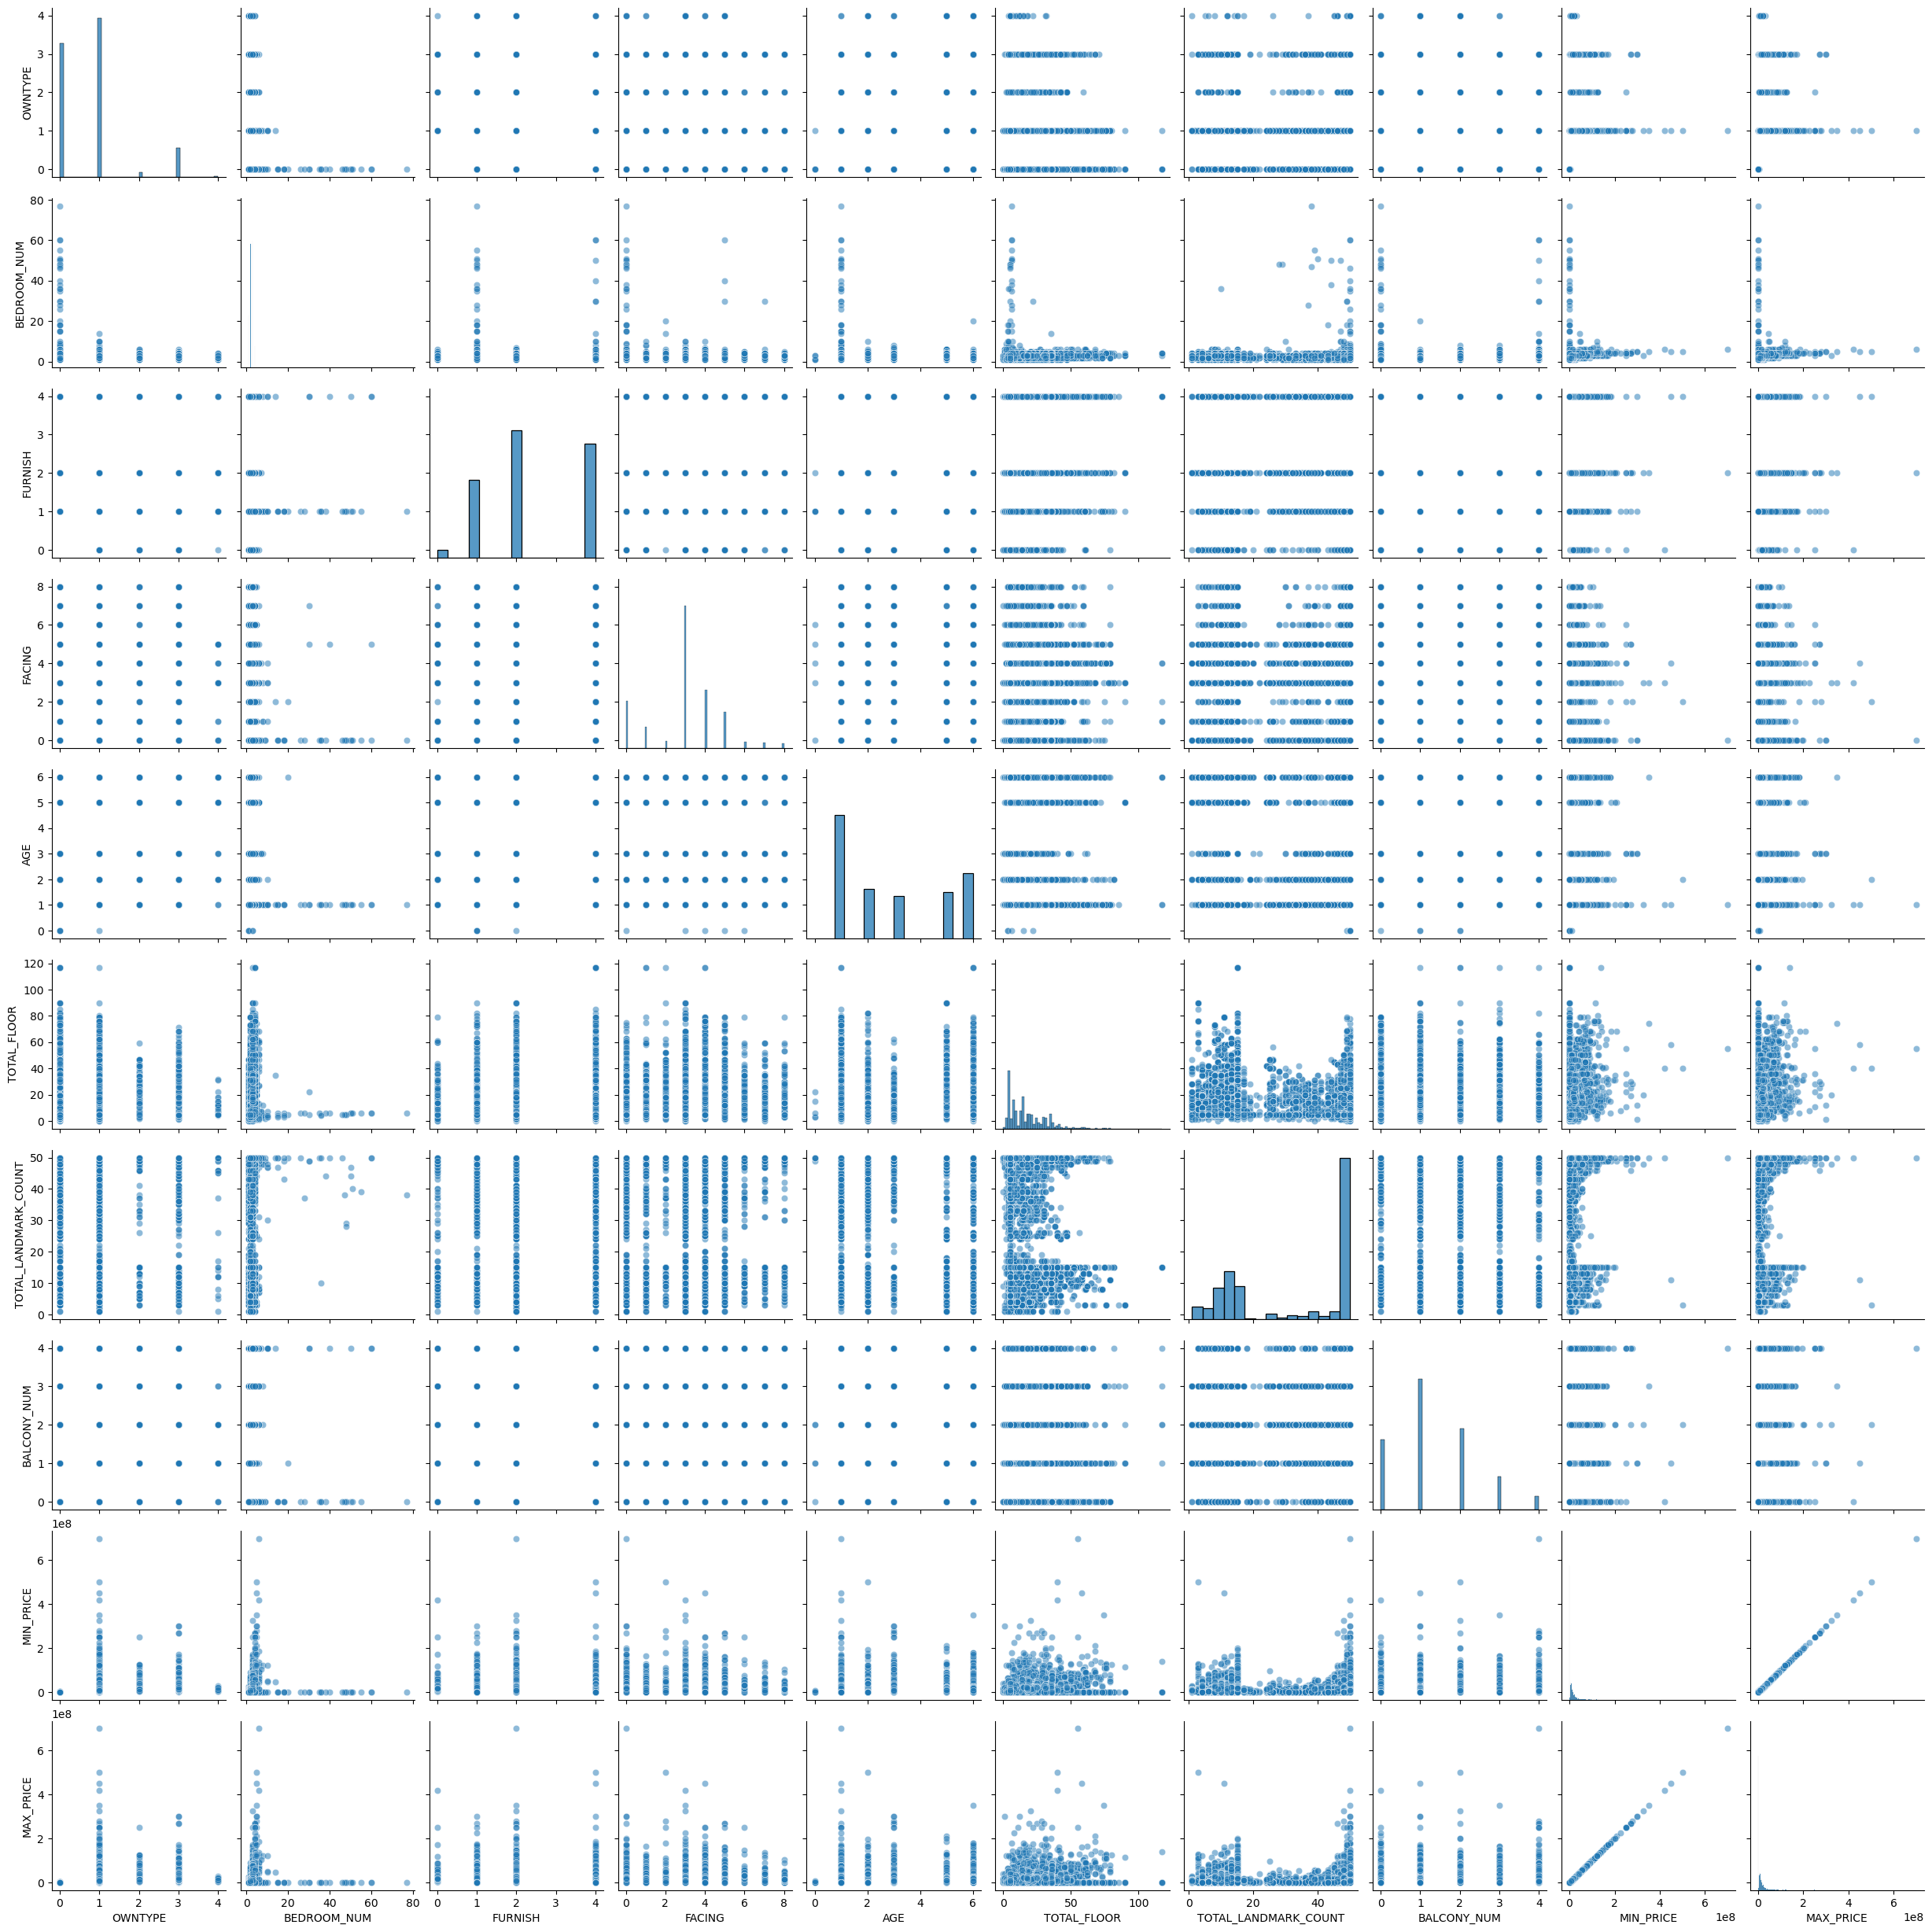

In [103]:
# comparing all numrical values at the same time 
sns.pairplot(house_data, kind='scatter' , plot_kws={'alpha':0.5})

In [104]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,MAP_DETAILS,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,"{'LATITUDE': '19.22071', 'LONGITUDE': '72.9867...",390 sq.ft.,49.0,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,"{'LATITUDE': '19.267984', 'LONGITUDE': '72.970...",1250 sq.ft.,39.0,2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,"{'LATITUDE': '19.25756', 'LONGITUDE': '72.98296'}",1250 sq.ft.,50.0,2.0,25.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN..."
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,"{'LATITUDE': '19.029645', 'LONGITUDE': '73.020...",850 sq.ft.,50.0,2.0,2.0,6000.0,6000.0,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU..."
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,"{'LATITUDE': '19.268855', 'LONGITUDE': '73.045...",1600 sq.ft.,14.0,3.0,13.0,5000.0,5000.0,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th..."


In [105]:
house_data.dtypes

PROPERTY_TYPE            object
CITY                     object
OWNTYPE                   int64
BEDROOM_NUM             float64
FURNISH                   int64
FACING                    int64
AGE                       int64
TOTAL_FLOOR             float64
MAP_DETAILS              object
AREA                     object
TOTAL_LANDMARK_COUNT    float64
BALCONY_NUM             float64
FLOOR_NUM                object
MIN_PRICE               float64
MAX_PRICE               float64
LOCATION                 object
dtype: object

In [106]:
# Identify Column Types and checking each columns unique values present in datasets

categorical_cols = house_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {house_data[col].nunique()} unique values") # gives total numbers of unique values
    print(house_data[col].value_counts().head()) # gives how many values holds each unique data 



PROPERTY_TYPE: 4 unique values
PROPERTY_TYPE
Residential Apartment        8890
Studio Apartment              117
Independent/Builder Floor      91
Serviced Apartments            76
Name: count, dtype: int64

CITY: 11 unique values
CITY
Hyderabad                 4031
Mumbai Andheri-Dahisar    1064
Navi Mumbai                912
Central Mumbai suburbs     815
Thane                      814
Name: count, dtype: int64

MAP_DETAILS: 3698 unique values
MAP_DETAILS
{'LATITUDE': '17.4359437', 'LONGITUDE': '78.3416731'}    243
{'LATITUDE': '17.4609913', 'LONGITUDE': '78.3532083'}    239
{'LATITUDE': '17.40223', 'LONGITUDE': '78.3444'}         142
{'LATITUDE': '17.47078', 'LONGITUDE': '78.30668'}        140
{'LATITUDE': '17.3923634', 'LONGITUDE': '78.3621784'}    128
Name: count, dtype: int64

AREA: 1503 unique values
AREA
1200 sq.ft.    226
1100 sq.ft.    191
1000 sq.ft.    164
650 sq.ft.     128
1250 sq.ft.    124
Name: count, dtype: int64

FLOOR_NUM: 79 unique values
FLOOR_NUM
3    1037
2    

In [107]:
# Handling  Mixed Data Types (like "34sqt feet")

def clean_area_column(col):
    #Extract numbers from mixed strings
    if col.dtype=='object':
             # Extract only numbers, handle NaN
        return  pd.to_numeric(col.str.extract('(\d+)')[0], errors='coerce')
    return col

# Applling  to messy columns  
house_data['AREA'] = clean_area_column(house_data['AREA'])
                           

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_18860\1240754852.py:7: SyntaxWarning: invalid escape sequence '\d'
  return  pd.to_numeric(col.str.extract('(\d+)')[0], errors='coerce')


In [108]:
house_data['AREA'] # converted to numeric

8799      390
8800     1250
8801     1250
8803      850
8805     1600
         ... 
27754     650
27755     780
27795    1000
27796    1600
27797    1220
Name: AREA, Length: 9174, dtype: int64

In [109]:
# Taking MAP_DETAILS which values are in dict(string) format not in dict
# so i am making separates of latitude and longitude and conerting inti dictionary

import ast
# Converting string to dictionary using 'ast.literal_eval'

def extract_lat(MAP_DETAILS):  # giving variable name for parameter to call map_details
    try:
        data = ast.literal_eval(MAP_DETAILS)
        return float(data['LATITUDE'])
    except Exception:
        return None

def extract_lon(MAP_DETAILS):
    try:
        data = ast.literal_eval(MAP_DETAILS)
        return float(data['LONGITUDE'])
    except Exception:
        return None
    
  ### Applling the functions to extract new columns
house_data['LATITUDE'] = house_data['MAP_DETAILS'].apply(extract_lat)
house_data['LONGITUDE'] = house_data['MAP_DETAILS'].apply(extract_lon)

In [110]:
house_data.drop(['MAP_DETAILS'], axis=1 , inplace=True)

In [111]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LOCATION,LATITUDE,LONGITUDE
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,1.0,1.0,20000.0,20000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.220710,72.986786
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,2.0,11.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.267984,72.970973
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,2.0,25.0,8000.0,8000.0,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",19.257560,72.982960
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,2.0,2.0,6000.0,6000.0,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU...",19.029645,73.020627
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,3.0,13.0,5000.0,5000.0,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th...",19.268855,73.045851


In [112]:
print(house_data['LOCATION'].head(3).tolist())


["{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '412496', 'BUILDING_NAME': 'Highway Darshan', 'SOCIETY_NAME': 'Highway Darshan', 'LOCALITY_ID': '1107', 'LOCALITY_NAME': 'Thane West', 'ADDRESS': '102, Shivanand Chs, Teen Hath Naka'}", "{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '0', 'BUILDING_NAME': 'Terraform Petunia, G Corp ', 'SOCIETY_NAME': 'Terraform Petunia, G Corp ', 'LOCALITY_ID': '1131', 'LOCALITY_NAME': 'Kasar vadavali', 'ADDRESS': '1501'}", "{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDING_ID': '0', 'BUILDING_NAME': 'nul', 'SOCIETY_NAME': 'nul', 'LOCALITY_ID': '5102', 'LOCALITY_NAME': 'Hiranandani Estate', 'ADDRESS': None}"]


In [113]:
# its in dict in list
# Extracting Location values and leaving unwanted values 
import ast
# Converting string to list of dict
def safe_parse(x):
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, dict):
            return [parsed]  # its wraps dict in list
        elif isinstance(parsed, list):
            return parsed
        else:
            return []
    except Exception:
        return []

# Apply the fix
house_data['LOCATION'] = house_data['LOCATION'].apply(safe_parse)


# Reapeating orginal row for each location dict
house_data = house_data.explode('LOCATION')  # explode() If one row had multiple location dictionaries,  this splits that row into multiple rows one per location.

# Extracting values from the dict
house_data['LOCALITY_ID'] = house_data['LOCATION'].apply(
    lambda loc_dict: loc_dict.get('LOCALITY_ID') if isinstance(loc_dict, dict) else None)

# Removing existing Location column
house_data.drop(['LOCATION'], axis=1 , inplace=True)

In [114]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,MIN_PRICE,MAX_PRICE,LATITUDE,LONGITUDE,LOCALITY_ID
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,1.0,1.0,20000.0,20000.0,19.220710,72.986786,1107
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,2.0,11.0,8000.0,8000.0,19.267984,72.970973,1131
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,2.0,25.0,8000.0,8000.0,19.257560,72.982960,5102
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,2.0,2.0,6000.0,6000.0,19.029645,73.020627,21757
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,3.0,13.0,5000.0,5000.0,19.268855,73.045851,1116


In [115]:
house_data.isnull().sum()

PROPERTY_TYPE           0
CITY                    0
OWNTYPE                 0
BEDROOM_NUM             0
FURNISH                 0
FACING                  0
AGE                     0
TOTAL_FLOOR             0
AREA                    0
TOTAL_LANDMARK_COUNT    0
BALCONY_NUM             0
FLOOR_NUM               0
MIN_PRICE               0
MAX_PRICE               0
LATITUDE                0
LONGITUDE               0
LOCALITY_ID             0
dtype: int64

In [116]:
# making Avarage of MIN_PRICE	MAX_PRICE 
house_data['AVERAGE_PRICE'] = house_data['MIN_PRICE']+house_data['MAX_PRICE']/2

# Droping Existing MIN_PRICE	MAX_PRICE 
house_data.drop(['MIN_PRICE',	'MAX_PRICE'], axis=1 , inplace=True)

In [117]:
house_data.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,AVERAGE_PRICE
8799,Residential Apartment,Thane,0,1.0,1,3,3,7.0,390,49.0,1.0,1.0,19.220710,72.986786,1107,30000.0
8800,Residential Apartment,Thane,0,4.0,1,0,6,17.0,1250,39.0,2.0,11.0,19.267984,72.970973,1131,12000.0
8801,Residential Apartment,Thane,0,4.0,1,0,6,30.0,1250,50.0,2.0,25.0,19.257560,72.982960,5102,12000.0
8803,Residential Apartment,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,2.0,2.0,19.029645,73.020627,21757,9000.0
8805,Residential Apartment,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,3.0,13.0,19.268855,73.045851,1116,7500.0


In [118]:
# checking all columns  is a categorical or binary classification or proportions
house_data.value_counts(normalize=True)



PROPERTY_TYPE          CITY                    OWNTYPE  BEDROOM_NUM  FURNISH  FACING  AGE  TOTAL_FLOOR  AREA  TOTAL_LANDMARK_COUNT  BALCONY_NUM  FLOOR_NUM  LATITUDE   LONGITUDE  LOCALITY_ID  AVERAGE_PRICE
Residential Apartment  Hyderabad               1        3.0          2        3       5    47.0         3000  25.0                  2.0          20         17.392363  78.362178  1654         28350000.0       0.000327
                       Mumbai Andheri-Dahisar  1        6.0          1        4       5    60.0         2800  8.0                   0.0          25         19.221539  72.861430  4960         138750000.0      0.000218
                       Hyderabad               1        3.0          4        3       1    31.0         1925  15.0                  3.0          6          17.422584  78.350841  872          34500000.0       0.000218
                                                                     2        4       5    14.0         2162  11.0                  2.0         

# Encoding for all categorical and ordinal columns
## Label Encoding (for ordinal data)
## One-Hot Encoding (for categorical data)

In [119]:
 # Checking  unique values in PROPERTY_TYPE
print("Unique Property Types:")
print(house_data['PROPERTY_TYPE'].value_counts())
print(f"\nTotal unique types: {house_data['PROPERTY_TYPE'].nunique()}")

Unique Property Types:
PROPERTY_TYPE
Residential Apartment        8890
Studio Apartment              117
Independent/Builder Floor      91
Serviced Apartments            76
Name: count, dtype: int64

Total unique types: 4


In [120]:
from sklearn.preprocessing import OneHotEncoder

# selecting only categorical columns to encode
X_categorical = house_data[['PROPERTY_TYPE']]

#  OneHot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(X_categorical)

#  Converting back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(X_categorical.columns))
encoded_df.index = house_data.index  # reset index to match with original datset

#  Mergeing with original dataset
house_data = pd.concat([house_data.drop(X_categorical.columns, axis=1), encoded_df], axis=1)


In [121]:
house_data.head()

,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,AVERAGE_PRICE,PROPERTY_TYPE_Residential Apartment,PROPERTY_TYPE_Serviced Apartments,PROPERTY_TYPE_Studio Apartment
8799,Thane,0,1.0,1,3,3,7.0,390,49.0,1.0,1.0,19.220710,72.986786,1107,30000.0,1.0,0.0,0.0
8800,Thane,0,4.0,1,0,6,17.0,1250,39.0,2.0,11.0,19.267984,72.970973,1131,12000.0,1.0,0.0,0.0
8801,Thane,0,4.0,1,0,6,30.0,1250,50.0,2.0,25.0,19.257560,72.982960,5102,12000.0,1.0,0.0,0.0
8803,Navi Mumbai,0,2.0,1,5,2,3.0,850,50.0,2.0,2.0,19.029645,73.020627,21757,9000.0,1.0,0.0,0.0
8805,Mumbai Beyond Thane,0,3.0,1,0,1,22.0,1600,14.0,3.0,13.0,19.268855,73.045851,1116,7500.0,1.0,0.0,0.0


In [122]:
 # Checking  unique values in CITY
print("Unique CITY'S:")
print(house_data['CITY'].value_counts())
print(f"\nTotal unique types: {house_data['CITY'].nunique()}")

Unique CITY'S:
CITY
Hyderabad                 4031
Mumbai Andheri-Dahisar    1064
Navi Mumbai                912
Central Mumbai suburbs     815
Thane                      814
South Mumbai               426
Mumbai South West          299
Secunderabad               240
Mumbai Harbour             210
Mumbai Beyond Thane        208
Mira Road And Beyond       155
Name: count, dtype: int64

Total unique types: 11


In [123]:
# one hot encoding for CITY

X_categorical = house_data[['CITY']]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data  = encoder.fit_transform(X_categorical)

encoded_df = pd.DataFrame(encoded_data , columns=encoder.get_feature_names_out(X_categorical.columns)) 
# to access how many new columns are created (encoder.get_feature_names_out(['CITY']))
encoded_df.index = house_data.index

house_data = pd.concat([house_data.drop(X_categorical.columns, axis=1) , encoded_df], axis=1 )

In [124]:
print("unique OWNTYPE'S")
print(house_data['OWNTYPE'].value_counts())
print(f"\n unique counts are: {house_data['OWNTYPE'].nunique()}")

unique OWNTYPE'S
OWNTYPE
1    4449
0    3749
3     816
2     132
4      28
Name: count, dtype: int64

 unique counts are: 5


In [125]:
# one hot encoding fro OWNTYPE
X_categorical = house_data[['OWNTYPE']]

encoder =  OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(X_categorical)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(X_categorical.columns))
encoded_df.index = house_data.index

house_data = pd.concat([house_data.drop(X_categorical.columns,axis=1),encoded_df], axis=1)


In [126]:
print("Unique FURNISH TYPE'S")
print(house_data['FURNISH'].value_counts())
print(f"Unique counts are: {house_data['FURNISH'].nunique()}")

Unique FURNISH TYPE'S
FURNISH
2    3570
4    3203
1    2184
0     217
Name: count, dtype: int64
Unique counts are: 4


In [127]:
house_data['FURNISH'].value_counts(normalize=True)

FURNISH
2    0.389143
4    0.349139
1    0.238064
0    0.023654
Name: proportion, dtype: float64

In [128]:
# one hot encoding for FURNISH
X_categorical = house_data[['FURNISH']]

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data  = encoder.fit_transform(X_categorical)

encoded_df = pd.DataFrame(encoded_data , columns=encoder.get_feature_names_out(X_categorical.columns))
encoded_df.index = house_data.index

house_data = pd.concat([house_data.drop(X_categorical, axis=1) ,  encoded_df], axis=1)


In [129]:
print("Unique FACING TYPE'S")
print(house_data['FACING'].value_counts())
print(f"Unique Counts are : {house_data['FACING'].nunique()}")

Unique FACING TYPE'S
FACING
3    3988
4    1618
0    1314
5    1008
1     597
2     199
6     176
7     144
8     130
Name: count, dtype: int64
Unique Counts are : 9


In [130]:
# one hot encoding for FACING

X_categorical = house_data[['FACING']]
encoder = OneHotEncoder(drop='first',sparse_output=False)

encoded_data = encoder.fit_transform(X_categorical)

encoded_df = pd.DataFrame(encoded_data , columns=encoder.get_feature_names_out(X_categorical.columns))
encoded_df.index = house_data.index

house_data = pd.concat([house_data.drop(X_categorical , axis=1), encoded_df], axis=1)

In [131]:
house_data

,BEDROOM_NUM,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,...,FURNISH_2,FURNISH_4,FACING_1,FACING_2,FACING_3,FACING_4,FACING_5,FACING_6,FACING_7,FACING_8
8799,1.0,3,7.0,390,49.0,1.0,1.0,19.220710,72.986786,1107,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8800,4.0,6,17.0,1250,39.0,2.0,11.0,19.267984,72.970973,1131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8801,4.0,6,30.0,1250,50.0,2.0,25.0,19.257560,72.982960,5102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,2.0,2,3.0,850,50.0,2.0,2.0,19.029645,73.020627,21757,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8805,3.0,1,22.0,1600,14.0,3.0,13.0,19.268855,73.045851,1116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27754,1.0,1,5.0,650,49.0,1.0,5,17.424037,78.450561,993,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27755,1.0,1,5.0,780,48.0,1.0,3,17.427164,78.443750,5537,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27795,2.0,1,3.0,1000,50.0,1.0,1,17.465387,78.478036,5566,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27796,3.0,5,5.0,1600,50.0,2.0,4,17.470780,78.306680,5769,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [132]:
house_data.dtypes

BEDROOM_NUM                            float64
AGE                                      int64
TOTAL_FLOOR                            float64
AREA                                     int64
TOTAL_LANDMARK_COUNT                   float64
BALCONY_NUM                            float64
FLOOR_NUM                               object
LATITUDE                               float64
LONGITUDE                              float64
LOCALITY_ID                             object
AVERAGE_PRICE                          float64
PROPERTY_TYPE_Residential Apartment    float64
PROPERTY_TYPE_Serviced Apartments      float64
PROPERTY_TYPE_Studio Apartment         float64
CITY_Hyderabad                         float64
CITY_Mira Road And Beyond              float64
CITY_Mumbai Andheri-Dahisar            float64
CITY_Mumbai Beyond Thane               float64
CITY_Mumbai Harbour                    float64
CITY_Mumbai South West                 float64
CITY_Navi Mumbai                       float64
CITY_Secunder

In [133]:
house_data[['LOCALITY_ID']].head() # these are in strings stored as numeric values , so we have to do label encoding 

,LOCALITY_ID
8799,1107
8800,1131
8801,5102
8803,21757
8805,1116


In [134]:
from sklearn.preprocessing import LabelEncoder

locality_id_label = LabelEncoder()

house_data['LOCALITY_ID'] = locality_id_label.fit_transform(house_data['LOCALITY_ID'])

In [135]:
# making FLOOR_NUM as numeric

house_data['FLOOR_NUM'] = pd.to_numeric(house_data['FLOOR_NUM'] , errors='coerce')

In [136]:
# Filling floor_nums null values
house_data['FLOOR_NUM'] = house_data['FLOOR_NUM'].fillna(house_data['FLOOR_NUM'].median())

In [137]:
house_data.dtypes # Checking iat any column have object type

BEDROOM_NUM                            float64
AGE                                      int64
TOTAL_FLOOR                            float64
AREA                                     int64
TOTAL_LANDMARK_COUNT                   float64
BALCONY_NUM                            float64
FLOOR_NUM                              float64
LATITUDE                               float64
LONGITUDE                              float64
LOCALITY_ID                              int32
AVERAGE_PRICE                          float64
PROPERTY_TYPE_Residential Apartment    float64
PROPERTY_TYPE_Serviced Apartments      float64
PROPERTY_TYPE_Studio Apartment         float64
CITY_Hyderabad                         float64
CITY_Mira Road And Beyond              float64
CITY_Mumbai Andheri-Dahisar            float64
CITY_Mumbai Beyond Thane               float64
CITY_Mumbai Harbour                    float64
CITY_Mumbai South West                 float64
CITY_Navi Mumbai                       float64
CITY_Secunder

In [138]:
house_data.isnull().sum() # Checking ist any column have null values

BEDROOM_NUM                            0
AGE                                    0
TOTAL_FLOOR                            0
AREA                                   0
TOTAL_LANDMARK_COUNT                   0
BALCONY_NUM                            0
FLOOR_NUM                              0
LATITUDE                               0
LONGITUDE                              0
LOCALITY_ID                            0
AVERAGE_PRICE                          0
PROPERTY_TYPE_Residential Apartment    0
PROPERTY_TYPE_Serviced Apartments      0
PROPERTY_TYPE_Studio Apartment         0
CITY_Hyderabad                         0
CITY_Mira Road And Beyond              0
CITY_Mumbai Andheri-Dahisar            0
CITY_Mumbai Beyond Thane               0
CITY_Mumbai Harbour                    0
CITY_Mumbai South West                 0
CITY_Navi Mumbai                       0
CITY_Secunderabad                      0
CITY_South Mumbai                      0
CITY_Thane                             0
OWNTYPE_1       

In [139]:
# final dataset for training
house_data

,BEDROOM_NUM,AGE,TOTAL_FLOOR,AREA,TOTAL_LANDMARK_COUNT,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,LOCALITY_ID,...,FURNISH_2,FURNISH_4,FACING_1,FACING_2,FACING_3,FACING_4,FACING_5,FACING_6,FACING_7,FACING_8
8799,1.0,3,7.0,390,49.0,1.0,1.0,19.220710,72.986786,57,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8800,4.0,6,17.0,1250,39.0,2.0,11.0,19.267984,72.970973,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8801,4.0,6,30.0,1250,50.0,2.0,25.0,19.257560,72.982960,766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,2.0,2,3.0,850,50.0,2.0,2.0,19.029645,73.020627,320,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8805,3.0,1,22.0,1600,14.0,3.0,13.0,19.268855,73.045851,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27754,1.0,1,5.0,650,49.0,1.0,5.0,17.424037,78.450561,934,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27755,1.0,1,5.0,780,48.0,1.0,3.0,17.427164,78.443750,824,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27795,2.0,1,3.0,1000,50.0,1.0,1.0,17.465387,78.478036,834,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27796,3.0,5,5.0,1600,50.0,2.0,4.0,17.470780,78.306680,845,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


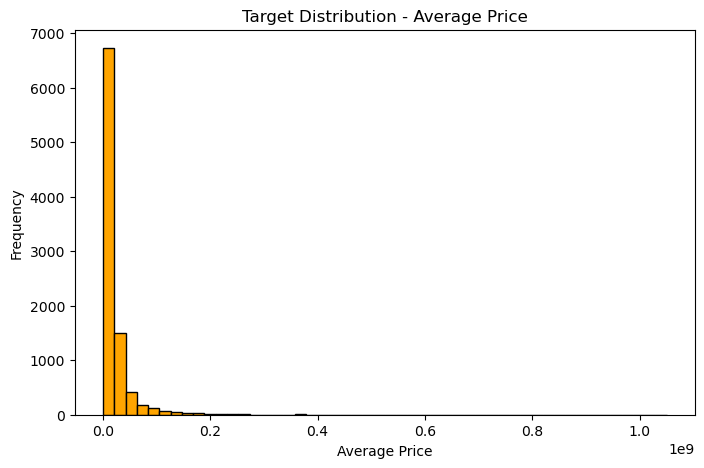

In [140]:

plt.figure(figsize=(8, 5))
plt.hist(house_data['AVERAGE_PRICE'], bins=50, edgecolor='black' ,color='orange')
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.title("Target Distribution - Average Price")
plt.show()


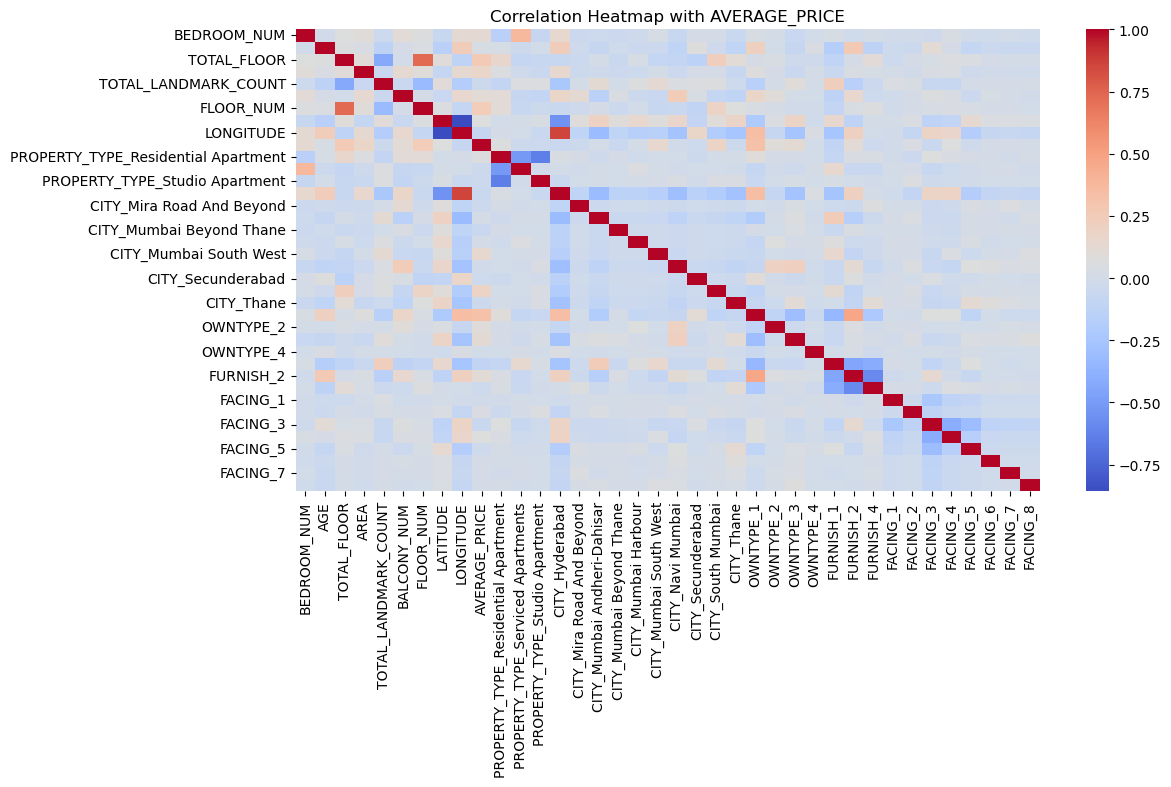

In [141]:
import seaborn as sns

numeric_df = house_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with AVERAGE_PRICE")
plt.show()


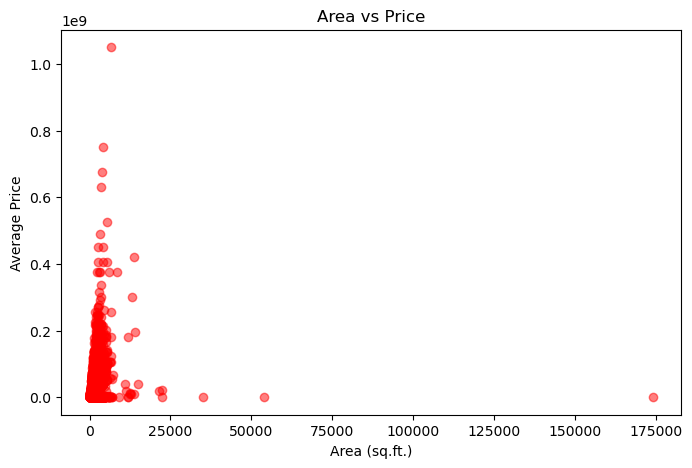

In [142]:
plt.figure(figsize=(8, 5))
plt.scatter(house_data['AREA'], house_data['AVERAGE_PRICE'], alpha=0.5, color='red')
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Average Price")
plt.title("Area vs Price")
plt.show()


# Training a model Using all "Basic To Advanced Regression Techniques" 

### 1. Linear Regression (Plain/Basic)
### 2. Ridge Regression
### 3. Lasso Regression
### 4. Polynomial Regression
### 5. DecisionTreeRegressor
### 6. RandomForestRegressor
### 7. XGBoost

In [143]:
house_data.columns

Index(['BEDROOM_NUM', 'AGE', 'TOTAL_FLOOR', 'AREA', 'TOTAL_LANDMARK_COUNT',
       'BALCONY_NUM', 'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'LOCALITY_ID',
       'AVERAGE_PRICE', 'PROPERTY_TYPE_Residential Apartment',
       'PROPERTY_TYPE_Serviced Apartments', 'PROPERTY_TYPE_Studio Apartment',
       'CITY_Hyderabad', 'CITY_Mira Road And Beyond',
       'CITY_Mumbai Andheri-Dahisar', 'CITY_Mumbai Beyond Thane',
       'CITY_Mumbai Harbour', 'CITY_Mumbai South West', 'CITY_Navi Mumbai',
       'CITY_Secunderabad', 'CITY_South Mumbai', 'CITY_Thane', 'OWNTYPE_1',
       'OWNTYPE_2', 'OWNTYPE_3', 'OWNTYPE_4', 'FURNISH_1', 'FURNISH_2',
       'FURNISH_4', 'FACING_1', 'FACING_2', 'FACING_3', 'FACING_4', 'FACING_5',
       'FACING_6', 'FACING_7', 'FACING_8'],
      dtype='object')

In [144]:
# spliting datasets for traing and testing data sets

X,y = house_data[['BEDROOM_NUM', 'AGE', 'TOTAL_FLOOR', 'AREA', 'TOTAL_LANDMARK_COUNT','BALCONY_NUM', 
                  'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'LOCALITY_ID','PROPERTY_TYPE_Residential Apartment',
                'PROPERTY_TYPE_Serviced Apartments', 'PROPERTY_TYPE_Studio Apartment','CITY_Hyderabad',
                'CITY_Mira Road And Beyond','CITY_Mumbai Andheri-Dahisar', 'CITY_Mumbai Beyond Thane',
                'CITY_Mumbai Harbour', 'CITY_Mumbai South West', 'CITY_Navi Mumbai', 'CITY_Secunderabad', 
                'CITY_South Mumbai', 'CITY_Thane', 'OWNTYPE_1', 'OWNTYPE_2', 'OWNTYPE_3', 'OWNTYPE_4', 
                'FURNISH_1', 'FURNISH_2','FURNISH_4', 'FACING_1', 'FACING_2', 'FACING_3', 'FACING_4', 'FACING_5',
                'FACING_6', 'FACING_7', 'FACING_8']].values , house_data['AVERAGE_PRICE'].values

print('Futures:', X[:1], '\nLabel', y[:10], sep='\n')

Futures:
[[  1.         3.         7.       390.        49.         1.
    1.        19.22071   72.986786  57.         1.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         1.         0.
    0.         0.         0.         1.         0.         0.
    0.         0.         1.         0.         0.         0.
    0.         0.      ]]

Label
[30000. 12000. 12000.  9000.  7500. 37500. 24750. 37500. 16500. 24000.]


In [145]:
# Traning a Model on split data

X_train, X_test , y_train , y_test = train_test_split(X,y ,  test_size=0.2 , random_state=42)
print('Trainig sets : %d rows\nTest sets : %d rows' % (X_train.shape[0], X_test.shape[0]))

Trainig sets : 7339 rows
Test sets : 1835 rows


In [146]:
# Checking Target ,  ist contains any issue

print("Any negative y_train?", (y_train < 0).any())
print("Any negative y_test?", (y_test < 0).any())
print("Min y_train:", y_train.min())
print("Min y_test:", y_test.min())
print("y_train dtype:", y_train.dtype)


Any negative y_train? False
Any negative y_test? False
Min y_train: 0.0
Min y_test: 3750.0
y_train dtype: float64


In [147]:
# for Labels (y)
# this  Handle the wide range with log transform
y_train_log = np.log1p(y_train)  # Compresses the range
y_test_log = np.log1p(y_test)


In [148]:
# for Futures for  improving  performance further except tree based models (X)
from sklearn.preprocessing import StandardScaler

# Refit scaler on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cliping  values to avoid extreme extrapolation
X_test_scaled = np.clip(X_test_scaled, -3, 3)  # keeping  within ±3 std deviation


## Training all models

In [149]:
# Training a  model using 1. inear Regression (Plain/Basic)

model_1 = LinearRegression(positive=True)  
model_1.fit(X_train_scaled , y_train_log) 
print(model_1)

# Training a  model using 2. Ridge Regression

model_2 = Ridge(positive=True)
model_2.fit(X_train_scaled , y_train_log)
print(model_2)

# Training a  model using 3. Lasso Regression

model_3 = Lasso(positive=True)
model_3.fit(X_train_scaled  , y_train_log)
print(model_3)

# Training a  model using 4. Polynomial Regression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)

model_4 = LinearRegression()
model_4.fit(X_train_poly, y_train_log)
print(model_4)


# Training a  model using 5. DecisionTreeRegressor

model_5 = DecisionTreeRegressor()
model_5.fit(X_train, y_train)
print(model_5)


# Training a  model using  6. RandomForestRegressor

model_6 = RandomForestRegressor()
model_6.fit(X_train, y_train)
print(model_6)


# training a model using  7. XGBoost

model_7 = XGBRegressor()
model_7.fit(X_train , y_train)
print(model_7)


LinearRegression(positive=True)
Ridge(positive=True)
Lasso(positive=True)
LinearRegression()
DecisionTreeRegressor()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


##  Evaluating Model Performance with Plots

In [150]:
# Training a  model using 1. inear Regression (Plain/Basic)

predictions_1 = model_1.predict(X_test_scaled)
np.set_printoptions(suppress=True)
print("predicted values:" , np.expm1(predictions_1[:10]))
print("Actual values: ", np.round(y_test[:10]))

predicted values: [   39482.41807146 33846330.37548307 27751820.26454517 11306444.73802387
    33828.34646274 10442210.39638954 15969250.53600021 15915610.64225939
 31631711.44236096    31018.50002301]
Actual values:  [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


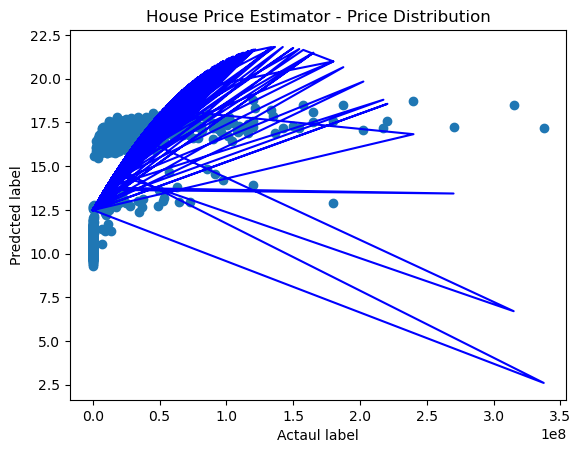

In [151]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_1)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_1, 2)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()



In [152]:
# Training a  model using 2. Ridge Regression

predictions_2 = model_2.predict(X_test_scaled)
np.set_printoptions(suppress=True)
print("Predicted values :", np.expm1(predictions_2[:10]))
print("Actual values :", np.round(y_test[:10]))


Predicted values : [   39512.44439472 33751974.54047526 27729955.8356951  11305568.34507181
    33849.41108463 10419400.60390724 15920749.90542557 15883784.40046494
 31509197.43795957    31141.8566576 ]
Actual values : [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


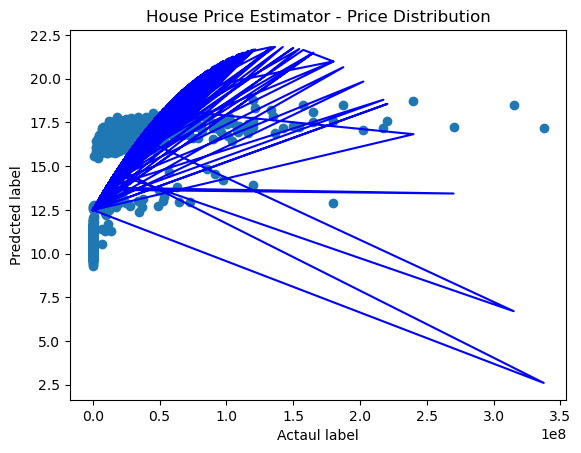

In [153]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_2)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_2, 2)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

In [154]:
# Training a  model using 3. Lasso Regression

predictions_3 = model_3.predict(X_test_scaled)
np.set_printoptions(suppress=True)
print("Predicted values: ", np.expm1(predictions_3[:10]))
print("Actual Values: ", np.round(y_test[:10]))


Predicted values:  [ 372678.11386819 7331706.72841076 7331706.72841076 7331706.72841076
  372678.11386819 7331706.72841076 7331706.72841076 7331706.72841076
 7331706.72841076  372678.11386819]
Actual Values:  [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


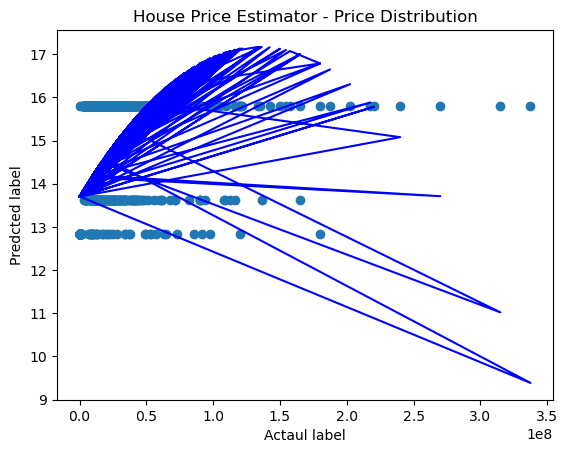

In [155]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_3)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_3, 2)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

In [156]:
# Training a  model using 4. Polynomial Regression

X_poly_test = poly.fit_transform(X_test_scaled)
predictions_4 = model_4.predict(X_poly_test)
np.set_printoptions(suppress=True)
print("Preduicted values :" , np.expm1(predictions_4[:10]))
print("Actual values :", np.round(y_test[:10]))

Preduicted values : [      -1.         23651995.08217212               inf  8860849.24271039
    49527.52502326               inf 15962960.54856253  7387161.18273676
 45769772.62297636    39090.72069122]
Actual values : [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


C:\Users\Ravichandran\AppData\Local\Temp\ipykernel_18860\4293863821.py:6: RuntimeWarning: overflow encountered in expm1
  print("Preduicted values :" , np.expm1(predictions_4[:10]))


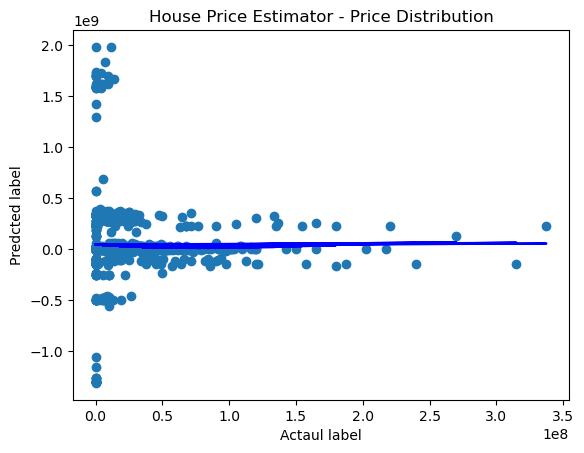

In [157]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_4)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_4, 3)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

In [158]:
# Training a  model using 5. DecisionTreeRegressor

predictions_5 = model_5.predict(X_test)
np.set_printoptions(suppress=True)
print("Predicted values: ", np.round(predictions_5[:10]))
print("Actual Values: ", np.round(y_test[:1]))

# giving all future names becouse it give tree structure that is very much long,
# so i used max_depth for how lenght is requred and one valraible Feature_names_1 i gave to 

Feature_names_1 =['BEDROOM_NUM', 'AGE', 'TOTAL_FLOOR', 'AREA', 'TOTAL_LANDMARK_COUNT','BALCONY_NUM', 
                  'FLOOR_NUM', 'LATITUDE', 'LONGITUDE', 'LOCALITY_ID','PROPERTY_TYPE_Residential Apartment',
                'PROPERTY_TYPE_Serviced Apartments', 'PROPERTY_TYPE_Studio Apartment','CITY_Hyderabad',
                'CITY_Mira Road And Beyond','CITY_Mumbai Andheri-Dahisar', 'CITY_Mumbai Beyond Thane',
                'CITY_Mumbai Harbour', 'CITY_Mumbai South West', 'CITY_Navi Mumbai', 'CITY_Secunderabad', 
                'CITY_South Mumbai', 'CITY_Thane', 'OWNTYPE_1', 'OWNTYPE_2', 'OWNTYPE_3', 'OWNTYPE_4', 
                'FURNISH_1', 'FURNISH_2','FURNISH_4', 'FACING_1', 'FACING_2', 'FACING_3', 'FACING_4', 'FACING_5',
                'FACING_6', 'FACING_7', 'FACING_8'] 

# Visualizing the model tree
tree = export_text(model_5,  feature_names=Feature_names_1, max_depth=3)
print(tree)

Predicted values:  [   67500. 33000000. 57750000. 10597800.    67500.  7462500. 11100000.
  9747000. 40500000.    52500.]
Actual Values:  [75000.]
|--- AREA <= 2492.00
|   |--- OWNTYPE_1 <= 0.50
|   |   |--- OWNTYPE_3 <= 0.50
|   |   |   |--- OWNTYPE_2 <= 0.50
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- OWNTYPE_2 >  0.50
|   |   |   |   |--- truncated branch of depth 13
|   |   |--- OWNTYPE_3 >  0.50
|   |   |   |--- BEDROOM_NUM <= 2.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- BEDROOM_NUM >  2.50
|   |   |   |   |--- truncated branch of depth 20
|   |--- OWNTYPE_1 >  0.50
|   |   |--- LONGITUDE <= 72.86
|   |   |   |--- BEDROOM_NUM <= 2.50
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- BEDROOM_NUM >  2.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- LONGITUDE >  72.86
|   |   |   |--- TOTAL_FLOOR <= 12.50
|   |   |   |   |--- truncated branch of depth 25
|   |   |   |--- TOTAL_FLOOR >  12.50
|   |   

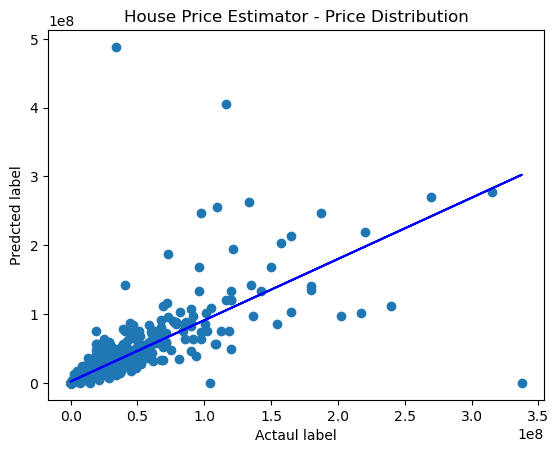

In [159]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_5)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_5, 1)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

In [160]:
# Training a  model using  6. RandomForestRegressor

predictions_6 = model_6.predict(X_test)
np.set_printoptions(suppress=True)
print("Predicted values: ", np.round(predictions_6[:10].astype(int)))
print("Actual Values: ", np.round(y_test[:10]))

Predicted values:  [    56927  30649445 111302995   8778856     76588  11479393  13496415
   9528277  40918680     52844]
Actual Values:  [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


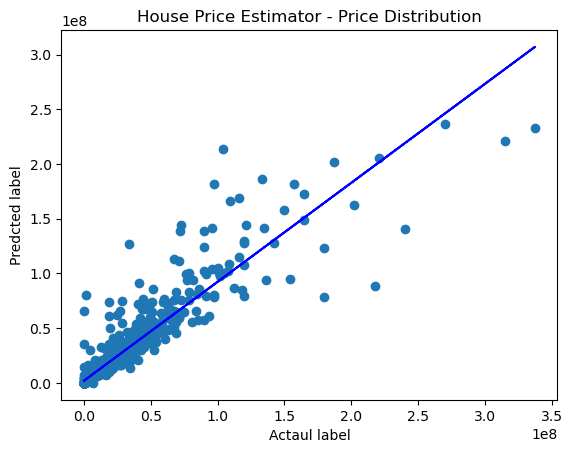

In [161]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_6)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_6, 1)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

In [162]:
# training a model using  7. XGBoost

predictions_7 = model_7.predict(X_test)
np.set_printoptions(suppress=True)
print("Predicted values: ", np.round(predictions_7[:10]))
print("Actual Values: ", np.round(y_test[:10]))

Predicted values:  [-2.0473700e+05  3.0493174e+07  1.0518548e+08  7.9365090e+06
  1.1013160e+06  7.8349900e+06  1.4978055e+07  8.5072270e+06
  4.4492900e+07  2.3055440e+06]
Actual Values:  [   75000. 33750000. 71250000.  8629500.    75000. 12000000. 11505000.
  9299998. 35100000.    52500.]


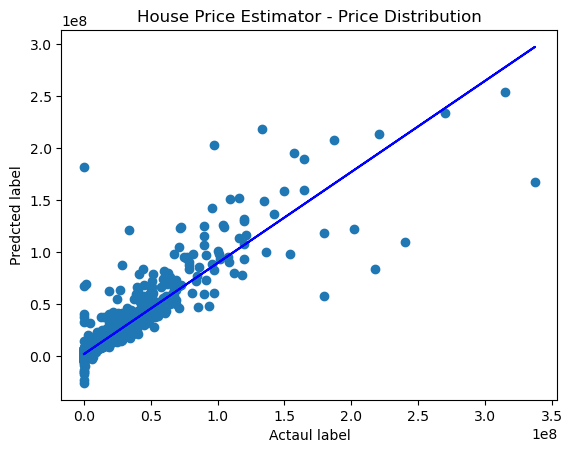

In [163]:
# ploting prediction values and y_test 
plt.scatter(y_test , predictions_7)
plt.xlabel("Actaul label")
plt.ylabel("Predcted label")
plt.title('House Price Estimator - Price Distribution')

# overlay the  Regression line
t = np.polyfit(y_test , predictions_7, 1)
z  =np.poly1d(t)
plt.plot(y_test, z(y_test), color='blue')
plt.show()

# calculating model evaluation metrics

In [164]:
# Training a  model using 1. inear Regression (Plain/Basic)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_1))
print("MAE:", mean_absolute_error(y_test, predictions_1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_1)))

R²: -0.3527829217799838
MAE: 16264734.093753176
RMSE: 31849834.233579528


In [165]:
# Training a  model using 2. Ridge Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_2))
print("MAE:", mean_absolute_error(y_test, predictions_2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_2)))

R²: -0.35278292186080606
MAE: 16264734.093800534
RMSE: 31849834.234530963


In [166]:
# Training a  model using 3. Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_3))
print("MAE:", mean_absolute_error(y_test, predictions_3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_3)))

R²: -0.3527829873153785
MAE: 16264733.928505654
RMSE: 31849835.00506008


In [167]:
# Training a  model using 4. Polynomial Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_4))
print("MAE:", mean_absolute_error(y_test, predictions_4))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_4)))

R²: -99.33335468339864
MAE: 102330353.8402382
RMSE: 274293671.0979325


In [168]:
# Training a  model using 5. DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_5))
print("MAE:", mean_absolute_error(y_test, predictions_5))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_5)))

R²: 0.5142509713912684
MAE: 4473966.7431880105
RMSE: 19085304.386656214


In [169]:
# Training a  model using  6. RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_6))
print("MAE:", mean_absolute_error(y_test, predictions_6))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_6)))

R²: 0.8601551137123078
MAE: 3307894.9200208965
RMSE: 10240388.081452345


In [170]:
# training a model using  7. XGBoost
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions_7))
print("MAE:", mean_absolute_error(y_test, predictions_7))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_7)))

R²: 0.819697082585785
MAE: 4007607.889815145
RMSE: 11627718.182750182


## Evaluating Model with Cross-Validation

In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_6, X, y, cv=5)
print("Cross-validated R²:", scores)

Cross-validated R²: [0.66270694 0.77933433 0.79553567 0.81013549 0.73412259]


## Testing Model performance by giving new input data

#### for prediction i used random forest becouse it gave better r2 score value 0.86%

In [171]:

# dictionary inputs
new_trip = {
    'BEDROOM_NUM': 2,
    'AGE': 5,
    'TOTAL_FLOOR': 15,
    'AREA': 950,
    'TOTAL_LANDMARK_COUNT': 12,
    'BALCONY_NUM': 2,
    'FLOOR_NUM': 7,
    'LATITUDE': 19.2183,
    'LONGITUDE': 72.9781,
    'LOCALITY_ID': 123,
    'PROPERTY_TYPE_Residential Apartment': 1,
    'PROPERTY_TYPE_Serviced Apartments': 0,
    'PROPERTY_TYPE_Studio Apartment': 0,
    'CITY_Hyderabad': 0,
    'CITY_Mira Road And Beyond': 0,
    'CITY_Mumbai Andheri-Dahisar': 1,
    'CITY_Mumbai Beyond Thane': 0,
    'CITY_Mumbai Harbour': 0,
    'CITY_Mumbai South West': 0,
    'CITY_Navi Mumbai': 0,
    'CITY_Secunderabad': 0,
    'CITY_South Mumbai': 0,
    'CITY_Thane': 0,
    'OWNTYPE_1': 1,
    'OWNTYPE_2': 0,
    'OWNTYPE_3': 0,
    'OWNTYPE_4': 0,
    'FURNISH_1': 0,
    'FURNISH_2': 1,
    'FURNISH_4': 0,
    'FACING_1': 0,
    'FACING_2': 1,
    'FACING_3': 0,
    'FACING_4': 0,
    'FACING_5': 0,
    'FACING_6': 0,
    'FACING_7': 0,
    'FACING_8': 0
}

# Converting  dict to DataFrame 
input_df = pd.DataFrame([new_trip])

# Make prediction
predicted_price = model_6.predict(input_df)[0]
print(f" Predicted house price: ₹{predicted_price:,.2f}")


 Predicted house price: ₹17,502,393.45


c:\Users\Ravichandran\anaconda3\conda-meta\ank ss\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### After testing 7 different models, **Random Forest Regressor** delivered the most powerful and accurate predictions for house price estimation, making it the best choice for this project. 


# Giving inputs without dataframe and future names

In [172]:
input_data = [[2, 5, 15, 950, 12, 2, 7, 19.2183, 92.9781, 124, 12500000, 
               1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]
print(f" Predicted house price: ₹ {model_6.predict(input_data)[0]}")


 Predicted house price: ₹ 9032880.615
